In [40]:
import numpy as np
import pandas
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi 
%matplotlib inline
import matplotlib.pyplot as plt


# IRIS Dataset


This notebook analysis the IRIS dataset, the data codebook can be found at this [link](https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.names)

In [20]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
header =np.array(['sepal_length','sepal_width','petal_length','petal_width','flowr_class'])
data = pandas.read_csv(url, low_memory=False,names=header)

In [26]:
print(data.shape) # matrix size

(150, 5)


In [27]:
print (data.head(5)) #print the first 5 rows

   sepal_length  sepal_width  petal_length  petal_width  flowr_class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


The research question is whether the sepal length of all flowers is the same?. The Ho is all means are equals

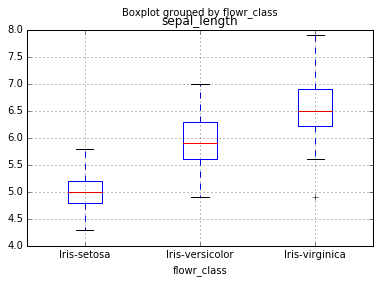

In [42]:
data.boxplot (column='sepal_length',by='flowr_class')

In [43]:
# using ols function for calculating the F-statistic and associated p value
model = smf.ols(formula='sepal_length ~ C(flowr_class)', data=data)
results = model.fit()
print (results.summary())


                            OLS Regression Results                            
Dep. Variable:           sepal_length   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     119.3
Date:                Fri, 15 Jan 2016   Prob (F-statistic):           1.67e-31
Time:                        17:32:21   Log-Likelihood:                -111.73
No. Observations:                 150   AIC:                             229.5
Df Residuals:                     147   BIC:                             238.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------
Interc

Since p-value is very small we can reject H0 and say that sepal length are different among the different flowers. Since there are more than 2 categorical values, we need to preform Tuckey test in order to find with flowers have a different mean

In [44]:
mc = multi.MultiComparison(data['sepal_length'], data['flowr_class'])
res = mc.tukeyhsd()
print(res.summary())

      Multiple Comparison of Means - Tukey HSD,FWER=0.05     
     group1          group2     meandiff lower  upper  reject
-------------------------------------------------------------
  Iris-setosa   Iris-versicolor   0.93   0.6862 1.1738  True 
  Iris-setosa    Iris-virginica  1.582   1.3382 1.8258  True 
Iris-versicolor  Iris-virginica  0.652   0.4082 0.8958  True 
-------------------------------------------------------------


To conclude, there is a significant difference of sepal length among all the flowers. It was shown by the boxplot and formalize by ANOVA and Tuckey test 